# Example notebook for the functions contained into plot.py()

## Bands

`read_electron_band` reads band output and saves data as into a `BandStructure` object. The `plot_electron_band` function plots the object.

Warnings message: Please ignore it when a 2D plot is used. Useful when converting the object into pymatgen formats.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output
import CRYSTALpytools.plot as cfplt

/tmp/ipykernel_4776/3580753383.py:1: UserWarning: Properties output file not found: 3D k path not available
  Data = Properties_output().read_electron_band('data/hTaAs_lda_bande44.BAND')


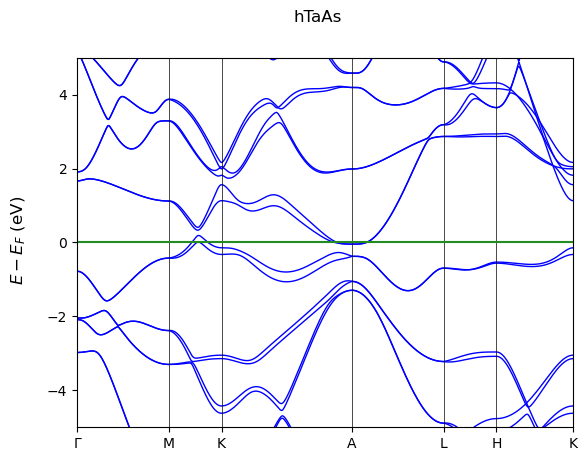

In [2]:
Data = Properties_output().read_electron_band('data/hTaAs_lda_bande44.BAND')
fig, ax = cfplt.plot_electron_band(Data, energy_range=[-5, 5], k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], title='hTaAs')

Alternatively, for a single band structure plot, you can use `electronics.ElectronBand` object for quick setups, plot and other manipulations.
In either way, you can change the defaults unit, bands color, line style, line width, range of k points, color of the Fermi level, and figsize as follows:

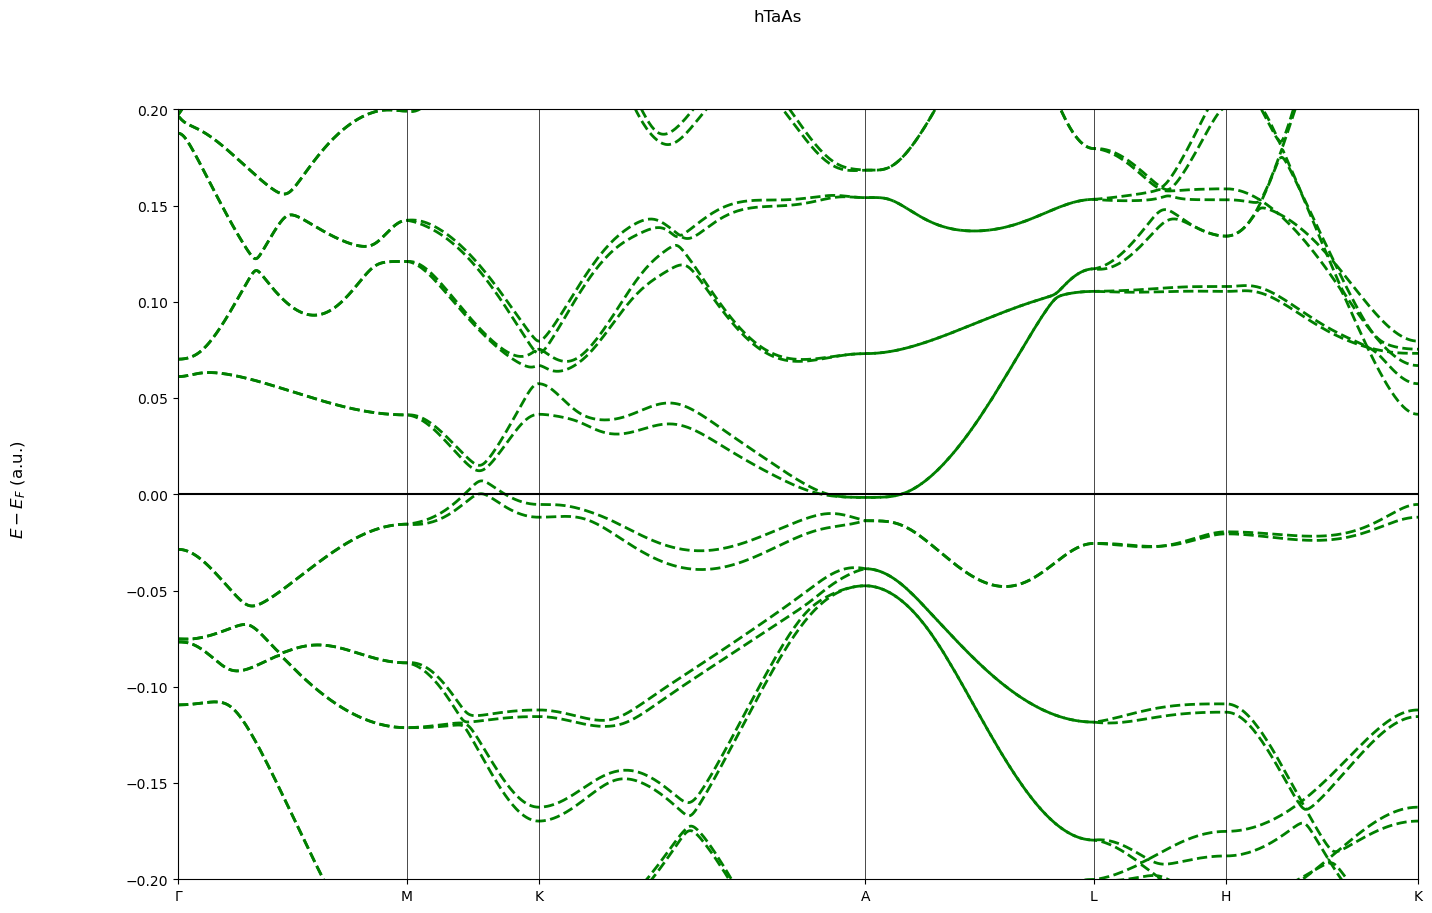

In [3]:
from CRYSTALpytools.electronics import ElectronBand

fig, ax = ElectronBand.from_file('data/hTaAs_lda_bande44.BAND').plot(
    unit='a.u.', energy_range=[-0.2, 0.2],
    k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], 
    title='hTaAs', linestl='--',linewidth=2, figsize=(16,10), color='green',
    fermi='black', fermiwidth=5, fermialpha=0.5
)

### Multiple Band Structures

With the `plot_cry_bands()` fuction you can plot multiple band structures in two ways: Overlapping the structures, and side by side plots.

#### Overlapped Plots

/tmp/ipykernel_4776/2579635710.py:4: UserWarning: Properties output file not found: 3D k path not available
  Data[index] = Properties_output().read_electron_band(file)


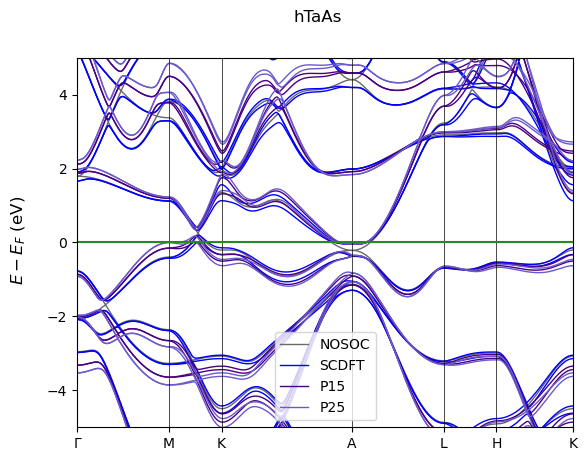

In [4]:
Data = ['data/hTaAs_lda_noso_bande.band', 'data/hTaAs_lda_bande44.BAND',
        'data/hTaAs_lda_P15_bande.band', 'data/hTaAs_lda_P25_bande.band']
for index, file in enumerate(Data):
    Data[index] = Properties_output().read_electron_band(file)

fig, ax = cfplt.plot_electron_band(Data, mode='multi', energy_range=[-5, 5],
                                   k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                                   title='hTaAs', labels=['NOSOC', 'SCDFT', 'P15', 'P25'])

As for the single band plots the default bands color, line style, line width, range of k points, Fermi level color, and figsize:

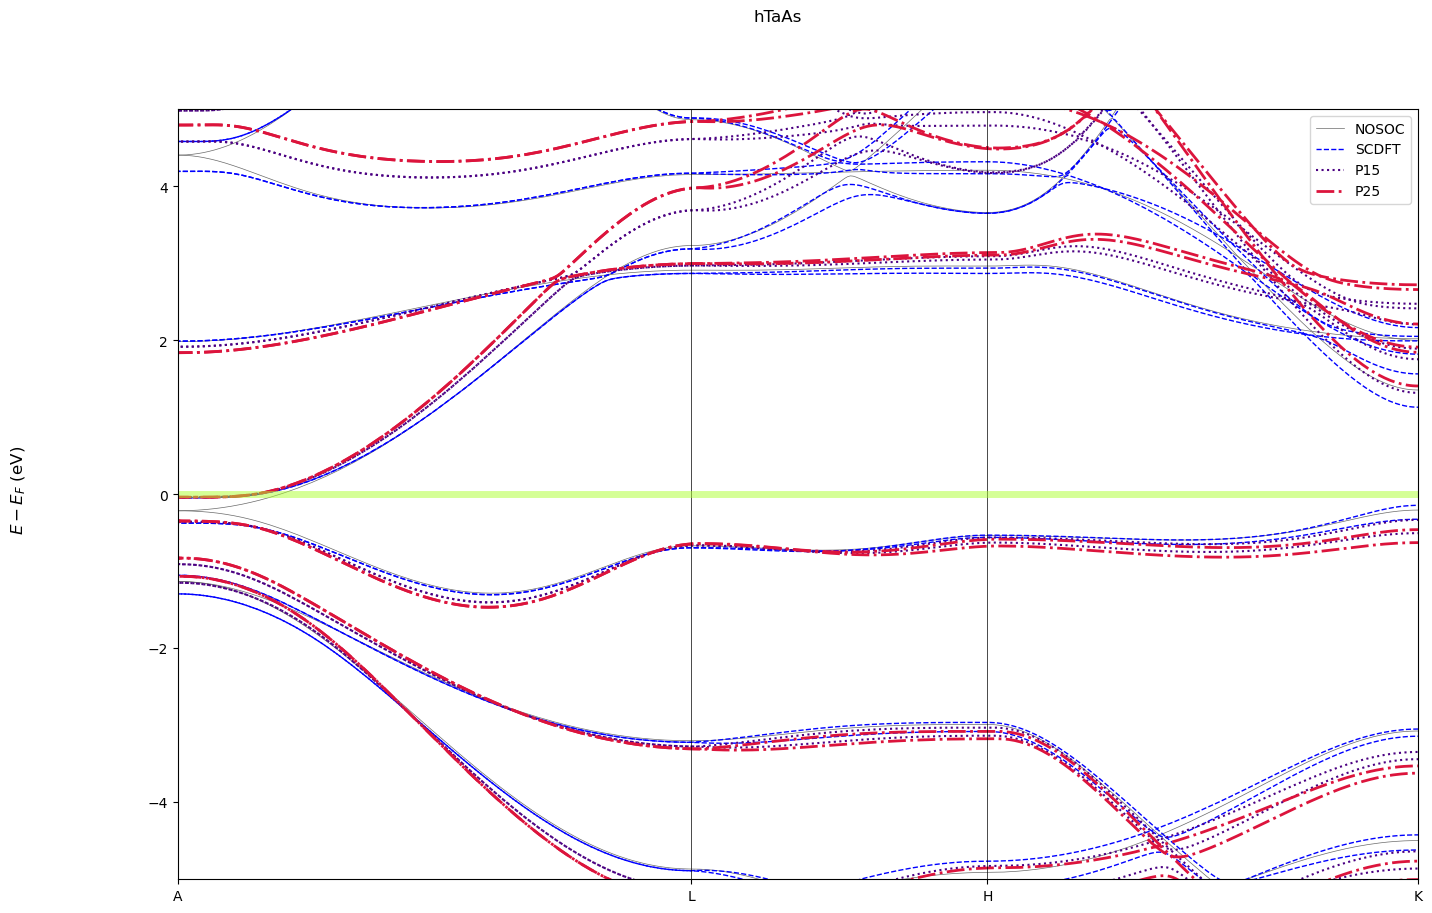

In [5]:
fig, ax = cfplt.plot_electron_band(Data, mode='multi', energy_range=[-5, 5],
                                   k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                                   title='hTaAs', labels=['NOSOC', 'SCDFT', 'P15', 'P25'],
                                   color=['dimgrey', 'blue', 'indigo', 'crimson'], fermi='greenyellow',
                                   k_range=['A', 'K1'], linestl=['-','--','dotted','dashdot'],
                                   linewidth=[0.5,1,1.5,2], figsize=(16,10),fermiwidth=5, fermialpha=0.5)

#### Side by Side Plots

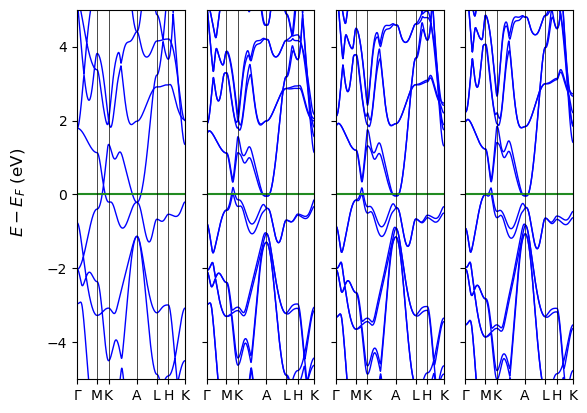

In [6]:
fig, ax = cfplt.plot_electron_band(Data, mode='compare', energy_range=[-5, 5],
                                   k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'])

As seen for the overlapped structures, we can change bands color, line style, line width, color of the fermi level and figsize. In addition you'll be able to change the display scheme 

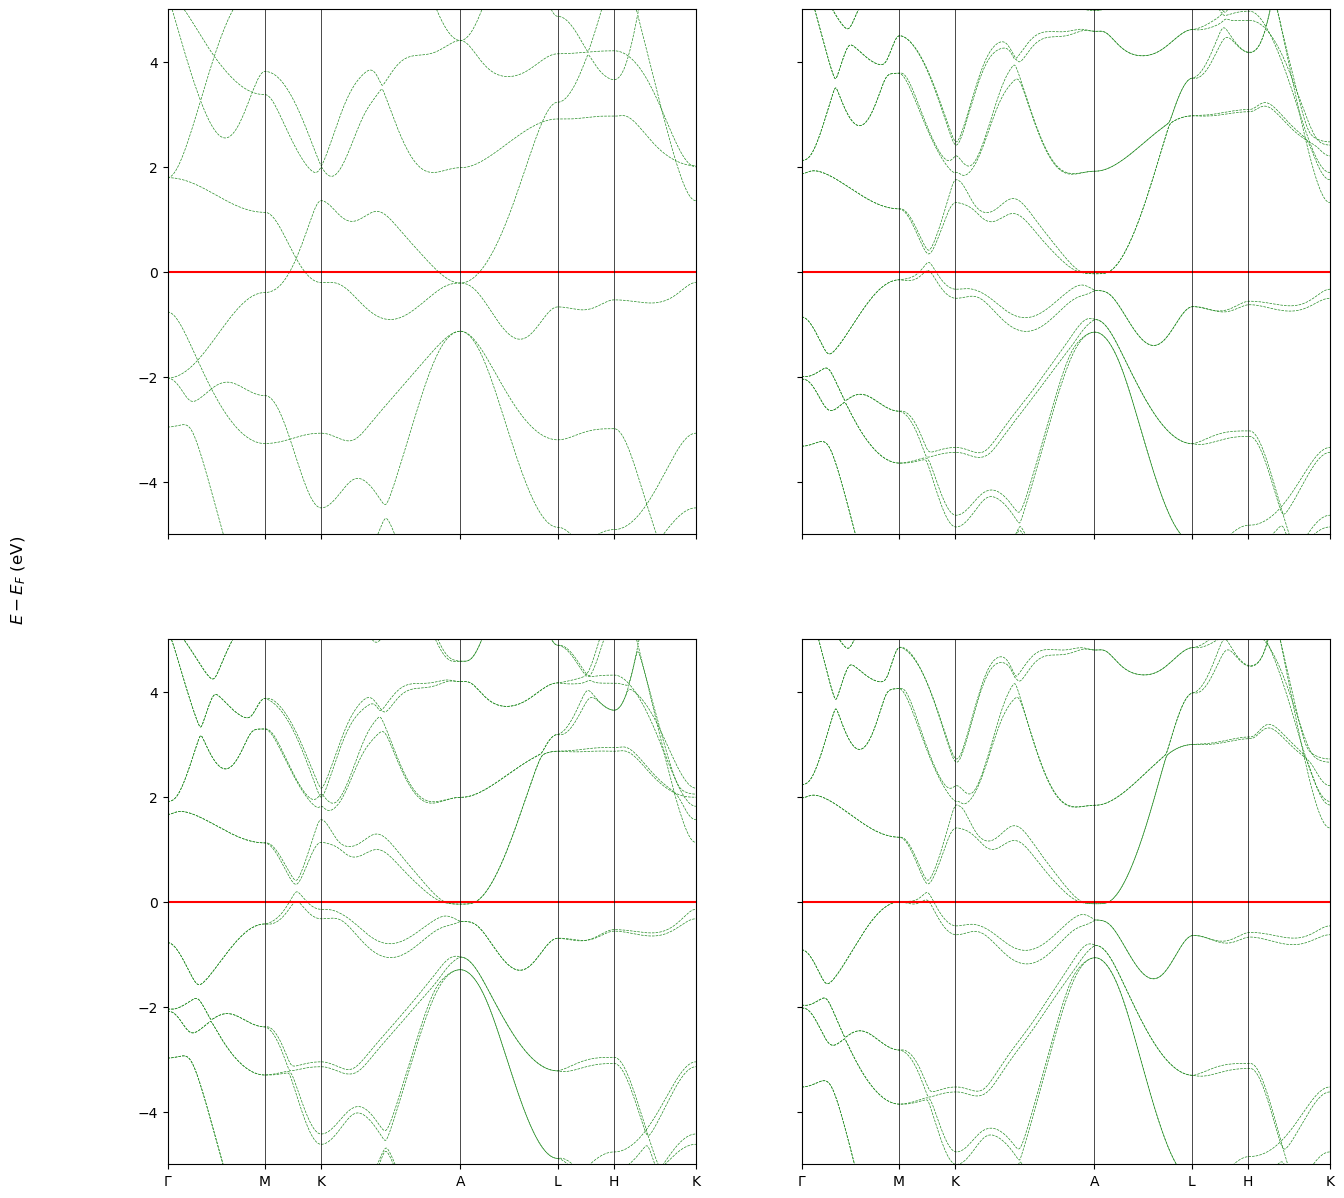

In [7]:
fig, ax = cfplt.plot_electron_band(Data, mode='compare',energy_range=[-5, 5],
                                   k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                                   color='forestgreen', fermi='red', linestl='--',
                                   linewidth=0.5, figsize=(15,15), scheme=(2,2))

### Doss

`CRYSTALpytools.plot.plot_electron_dos()` function will also give you the opportunity to plot a the Density of States of the system using the following syntax:

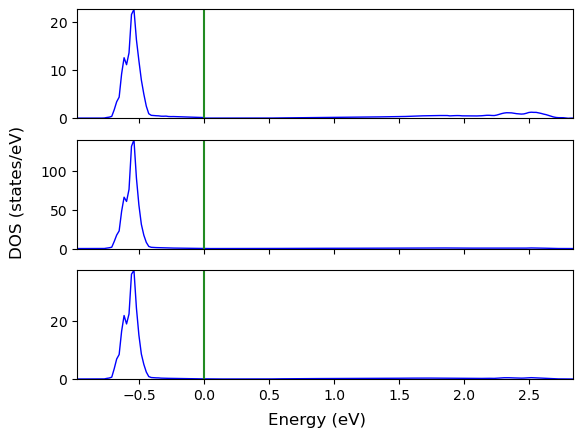

In [8]:
Data=Properties_output().read_electron_dos('data/doss_96.DOSS')
fig, ax = cfplt.plot_electron_dos(Data)

Similar to band structure plot, for a single system `CRYSTALpytools.electronics.ElectronDOS` offers an object oriented way for data visualization. Either way supports the further customization of DOSS plots:

(<Figure size 1600x1000 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

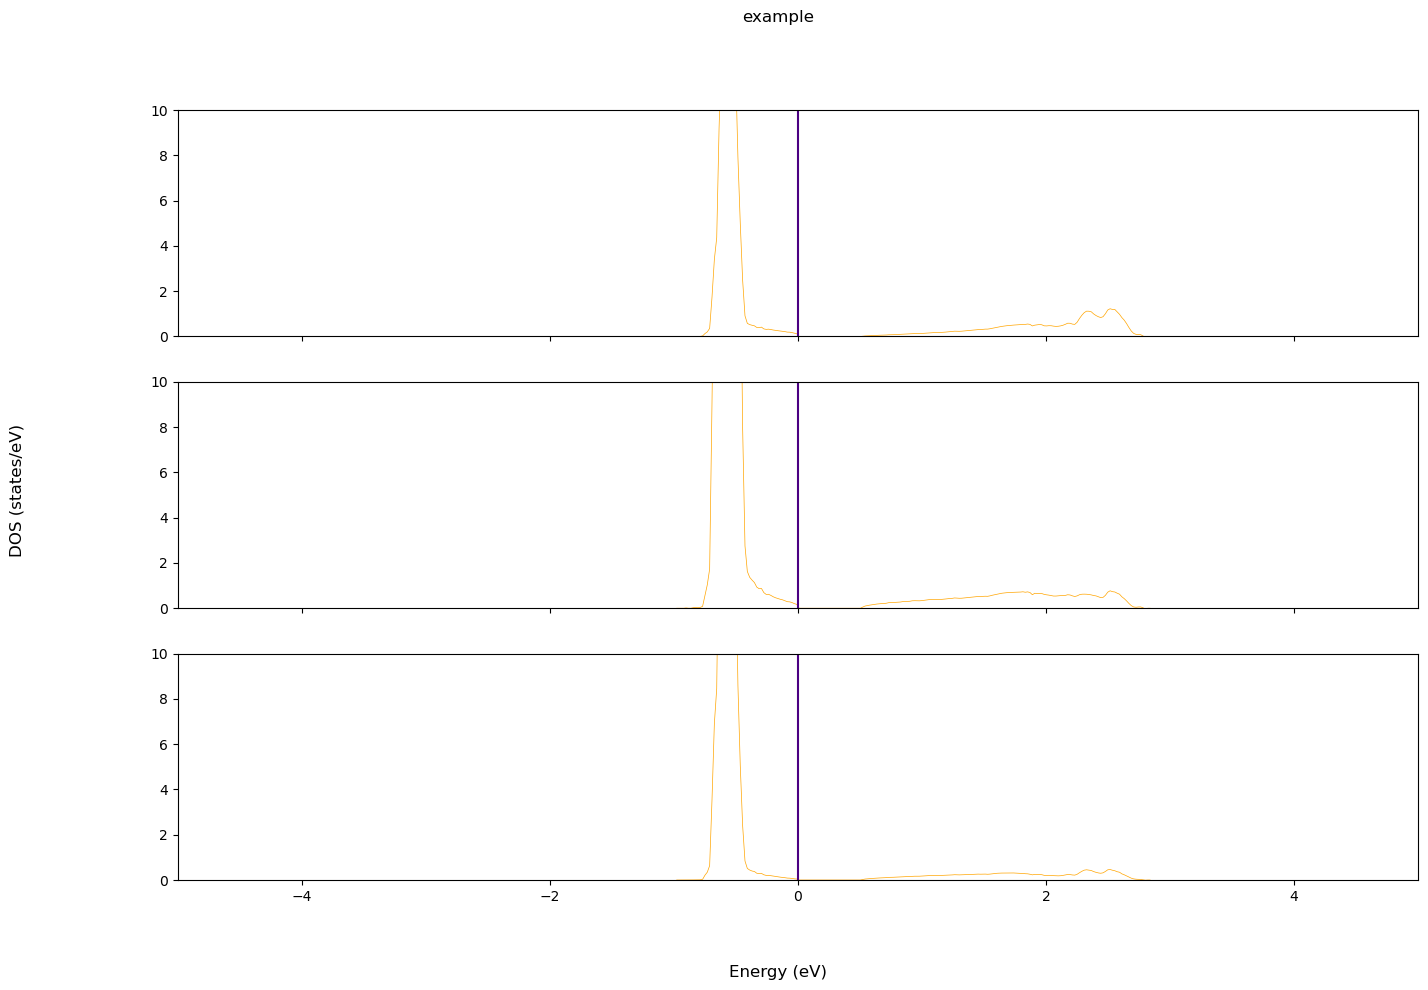

In [10]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16,10), linestl=['-','--','dotted','dashdot'],
                        linewidth=0.5, energy_range=[-5,5], dos_range=[0,10], color='orange', fermi='indigo' )

Furthermore you can also plot a selected number of projections whit a list of numbers where 1 will correspond to the first projection in the file

passo for eV eV


(<Figure size 1600x1000 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

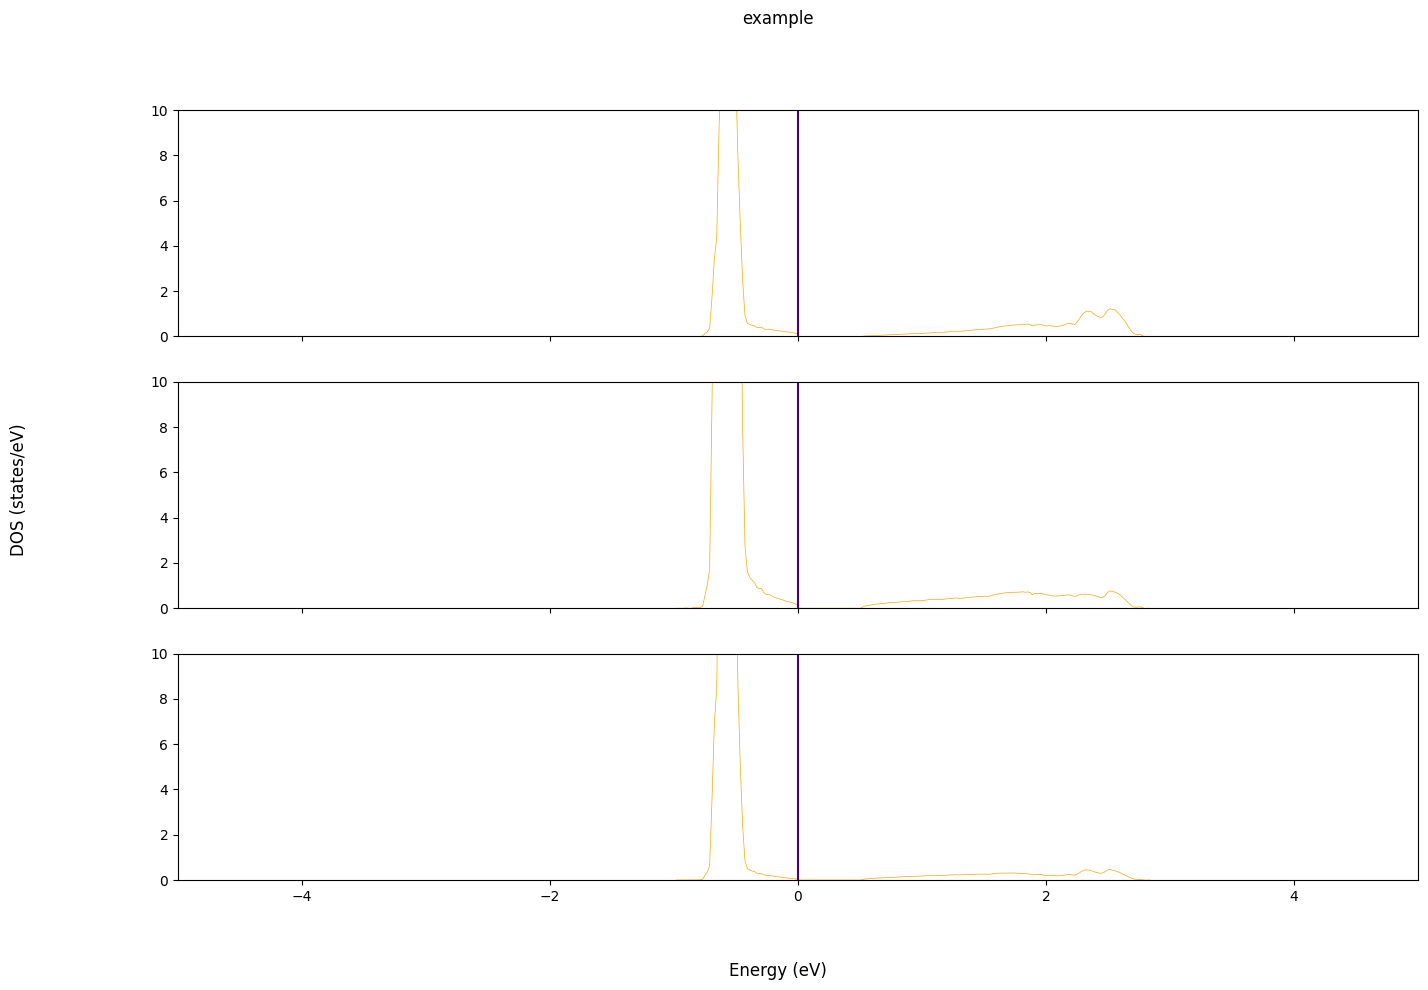

In [5]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16,10),
                        linestl=['-','--','dotted','dashdot'],
                        linewidth=0.5, energy_range=[-5,5], dos_range=[0,10],
                        color='orange', fermi='indigo', prj=[1,2,3])

If you prefer all of the projection can be plotted into a single plot as follows:

passo for eV eV


(<Figure size 1600x1000 with 1 Axes>, <Axes: >)

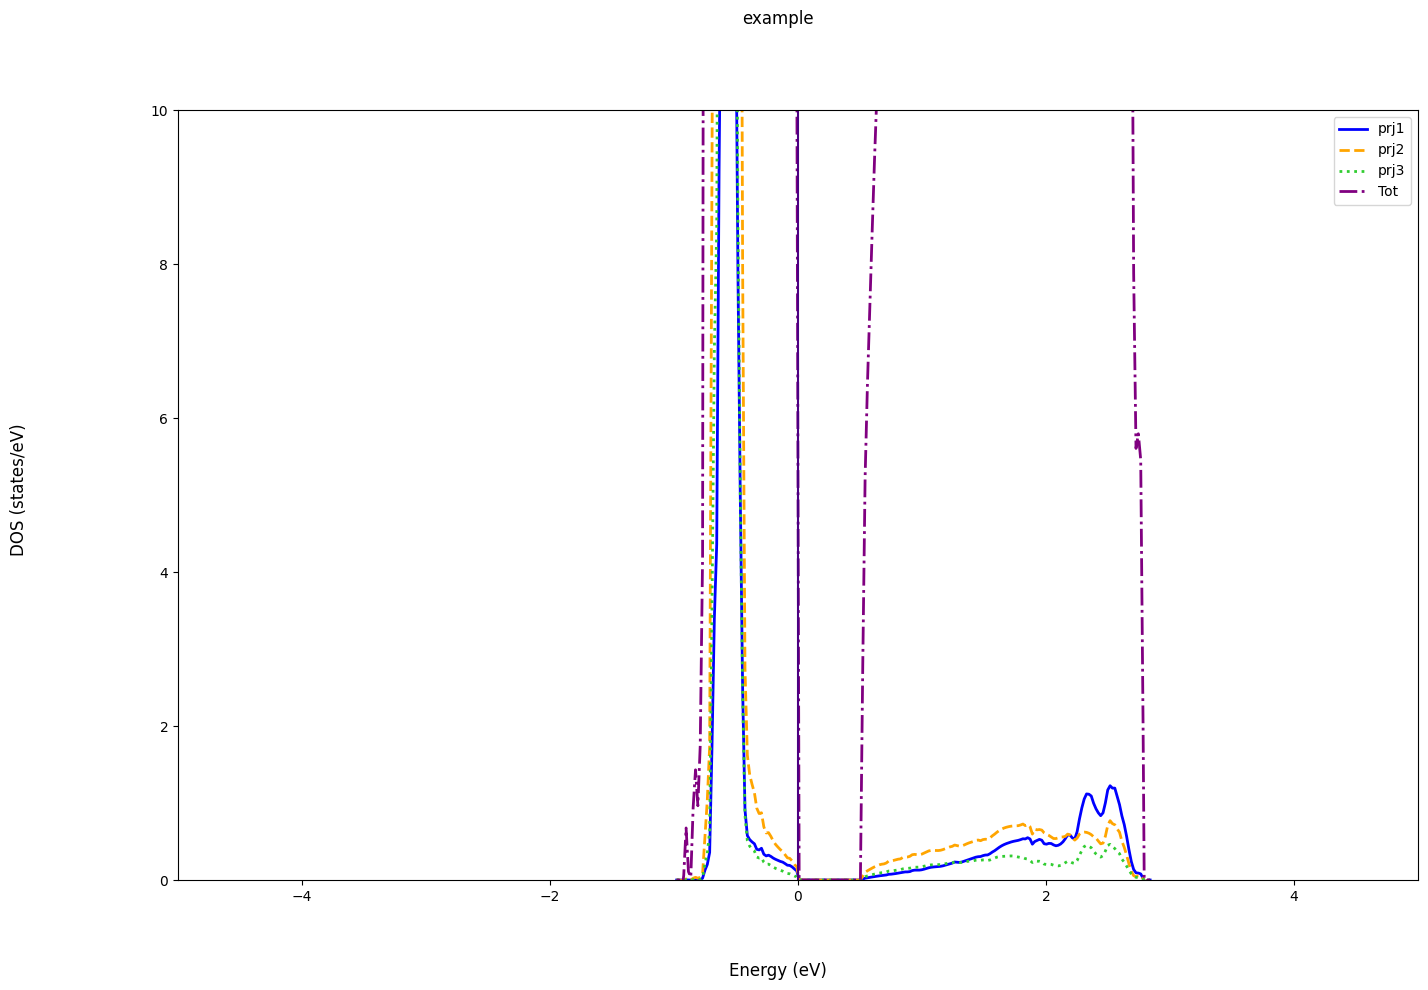

In [6]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16,10),
                        linestl=['-','--','dotted','dashdot'], linewidth=2,
                        energy_range=[-5,5], dos_range=[0,10],
                        color=['blue', 'orange', 'limegreen','purple'],
                        fermi='indigo', overlap=True,
                        labels=['prj1', 'prj2', 'prj3', 'Tot'] )

As before you can also plot a restricted number of projections: 

passo for eV eV
0
1
3


(<Figure size 1600x1000 with 1 Axes>, <Axes: >)

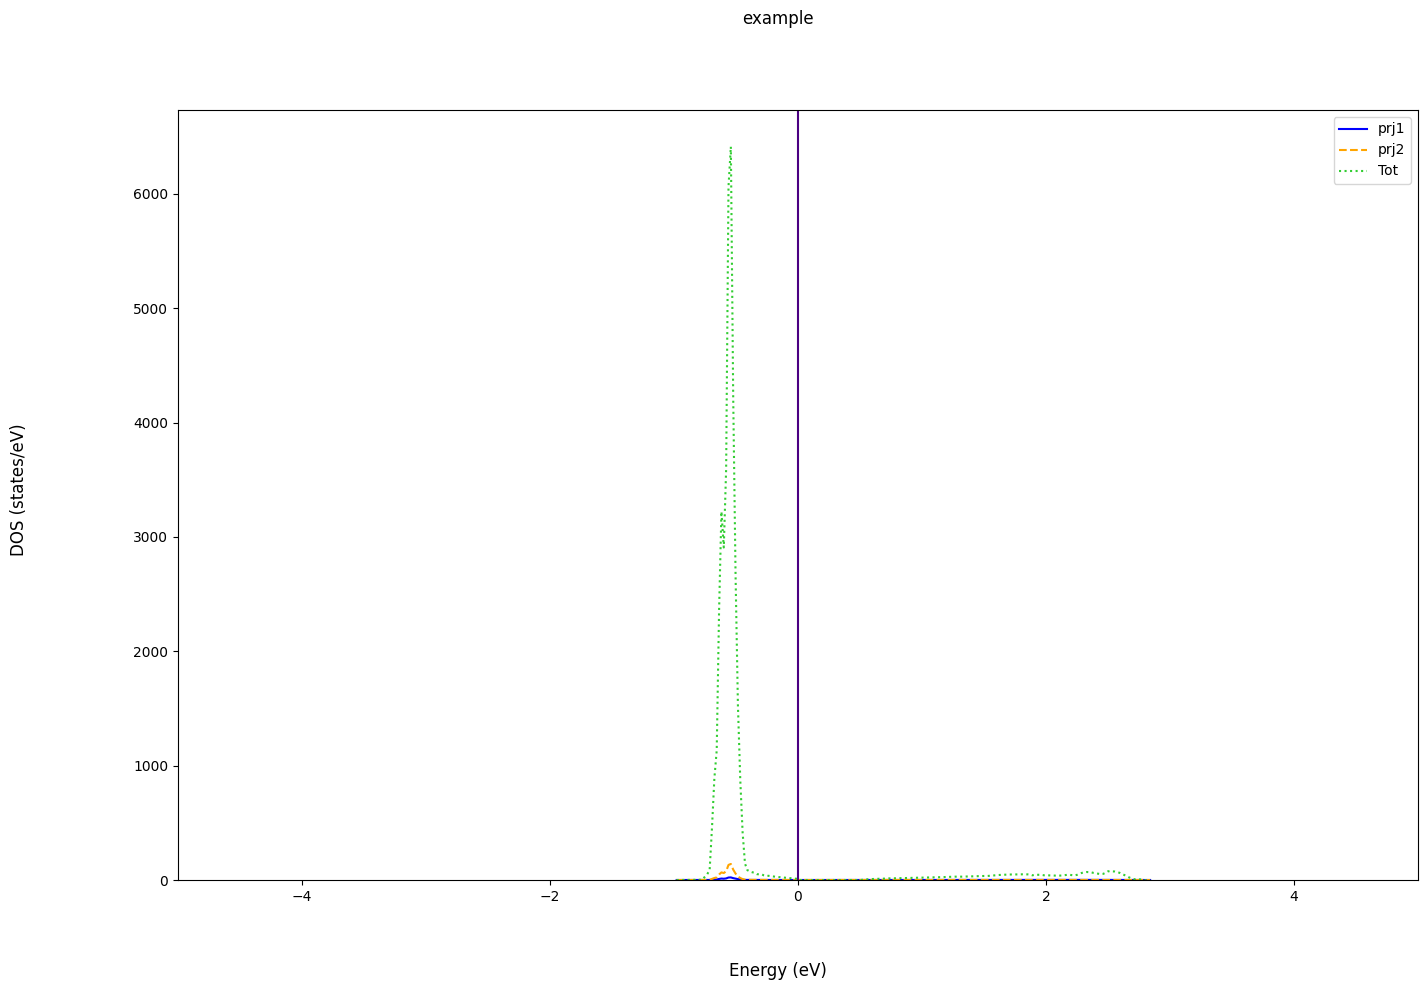

In [7]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16, 10),
                        linestl=['-', '--', 'dotted'], linewidth=1.5,
                        energy_range=[-5, 5], color=['blue', 'orange', 'limegreen'],
                        fermi='indigo', overlap=True, labels=['prj1', 'prj2', 'Tot'],
                        prj=[1,2,4])

In case of an open shell calculations you can use the beta (default: 'up') keyword to customize your plot as follows:

(202, 5, 2)
passo for eV eV


(<Figure size 1600x1000 with 5 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

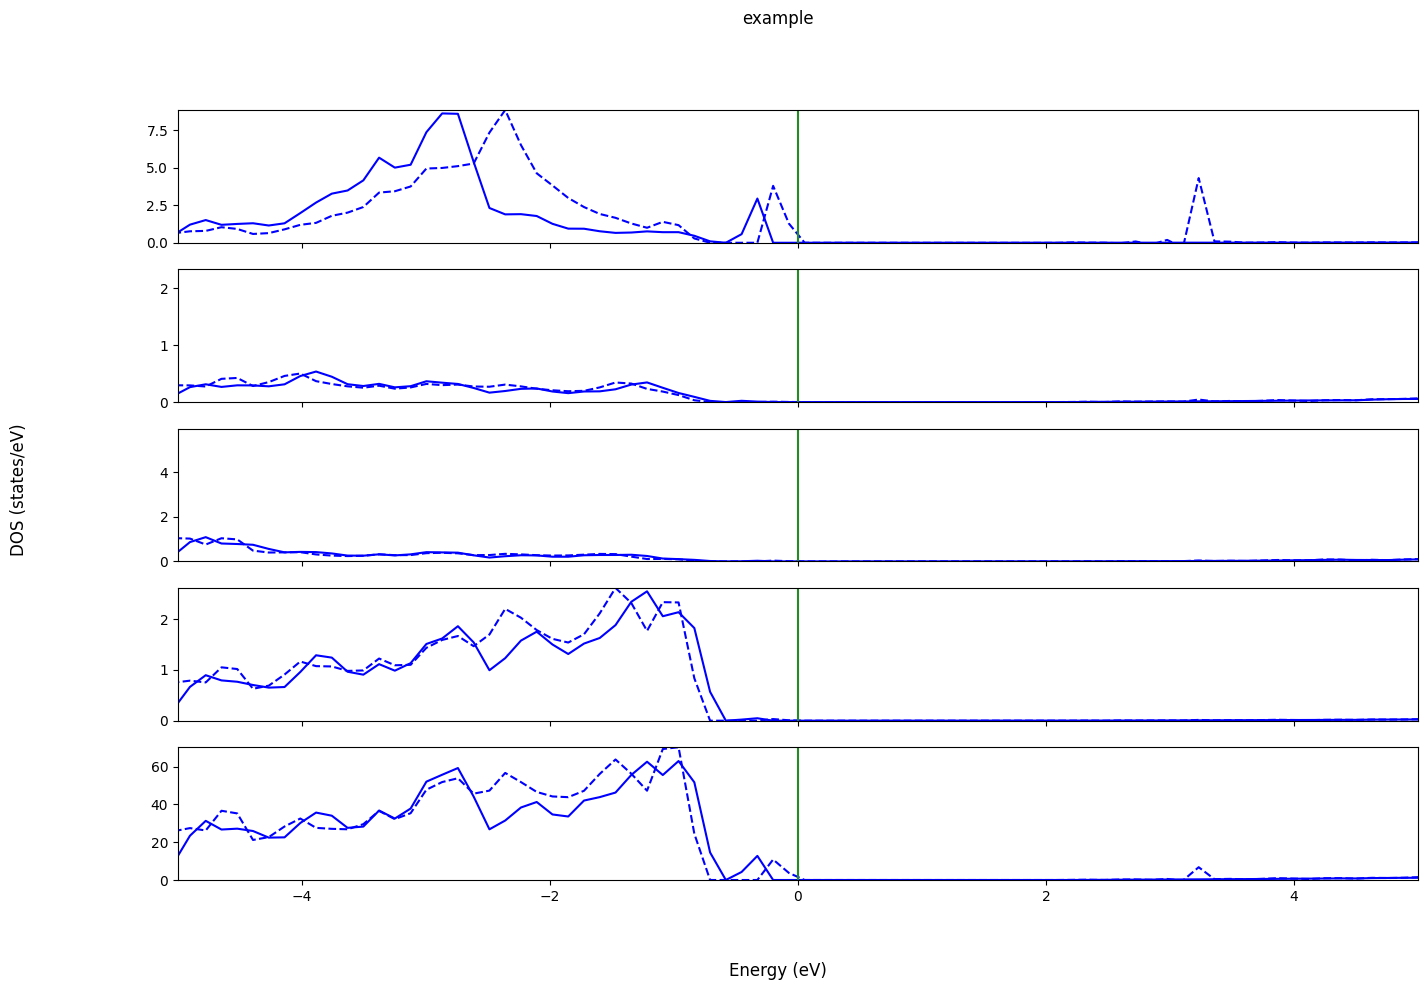

In [8]:
Data=Properties_output().read_electron_dos('data/doss_ito-cu.DOSS')
cfplt.plot_electron_dos(Data, title='example', figsize=(16, 10), linewidth=1.5,
                        energy_range=[-5, 5])

passo for eV eV


(<Figure size 1600x1000 with 5 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

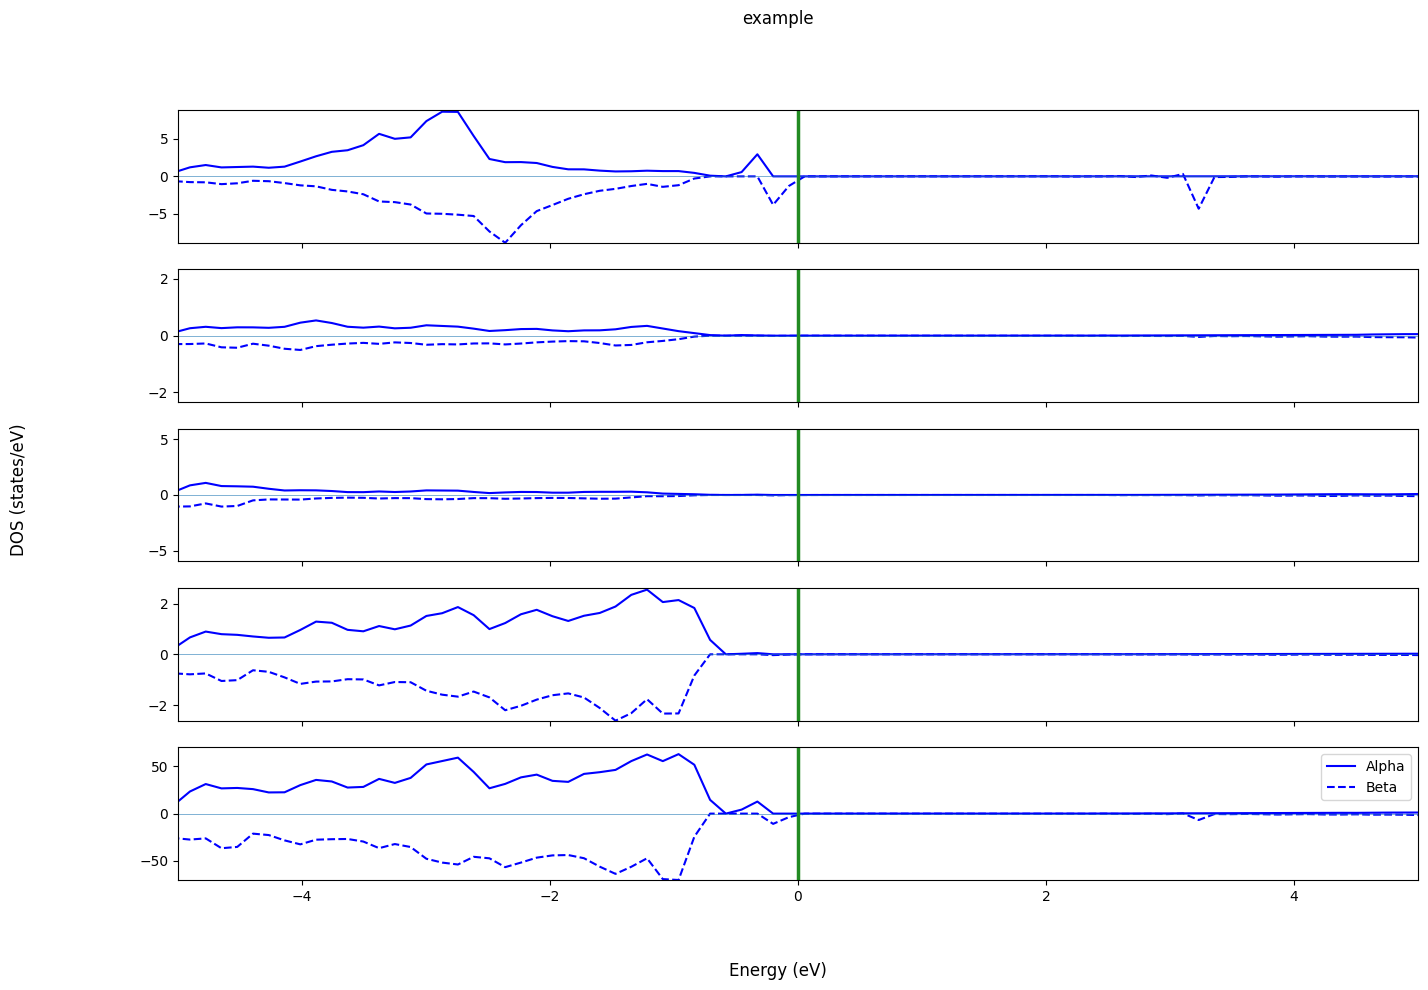

In [9]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16, 10), linewidth=1.5,
                        energy_range=[-5, 5], beta='down')

The same option is also available for overlap=True:

passo for eV eV


(<Figure size 1600x1000 with 1 Axes>, <Axes: >)

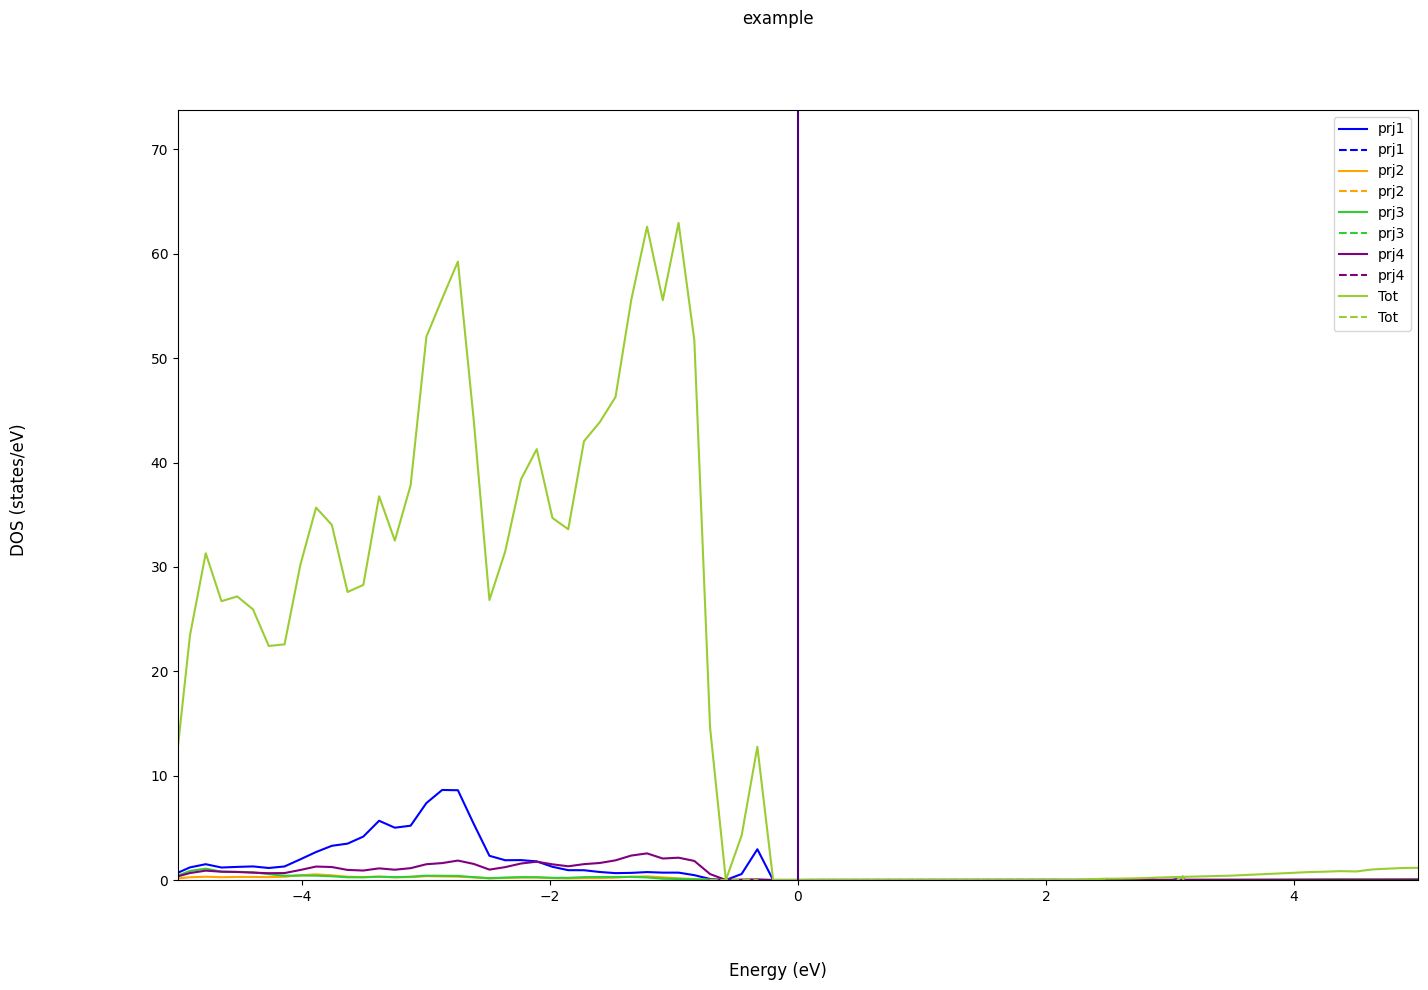

In [10]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16, 10),
                        linestl=['-', '--', 'dotted', 'dashdot', '-'], linewidth=1.5,
                        energy_range=[-5, 5],
                        color=['blue', 'orange', 'limegreen', 'purple', 'yellowgreen'],
                        fermi='indigo', overlap=True,
                        labels=['prj1', 'prj2', 'prj3', 'prj4','Tot'] )

passo for eV eV
0
1
3
4


(<Figure size 1600x1000 with 1 Axes>, <Axes: >)

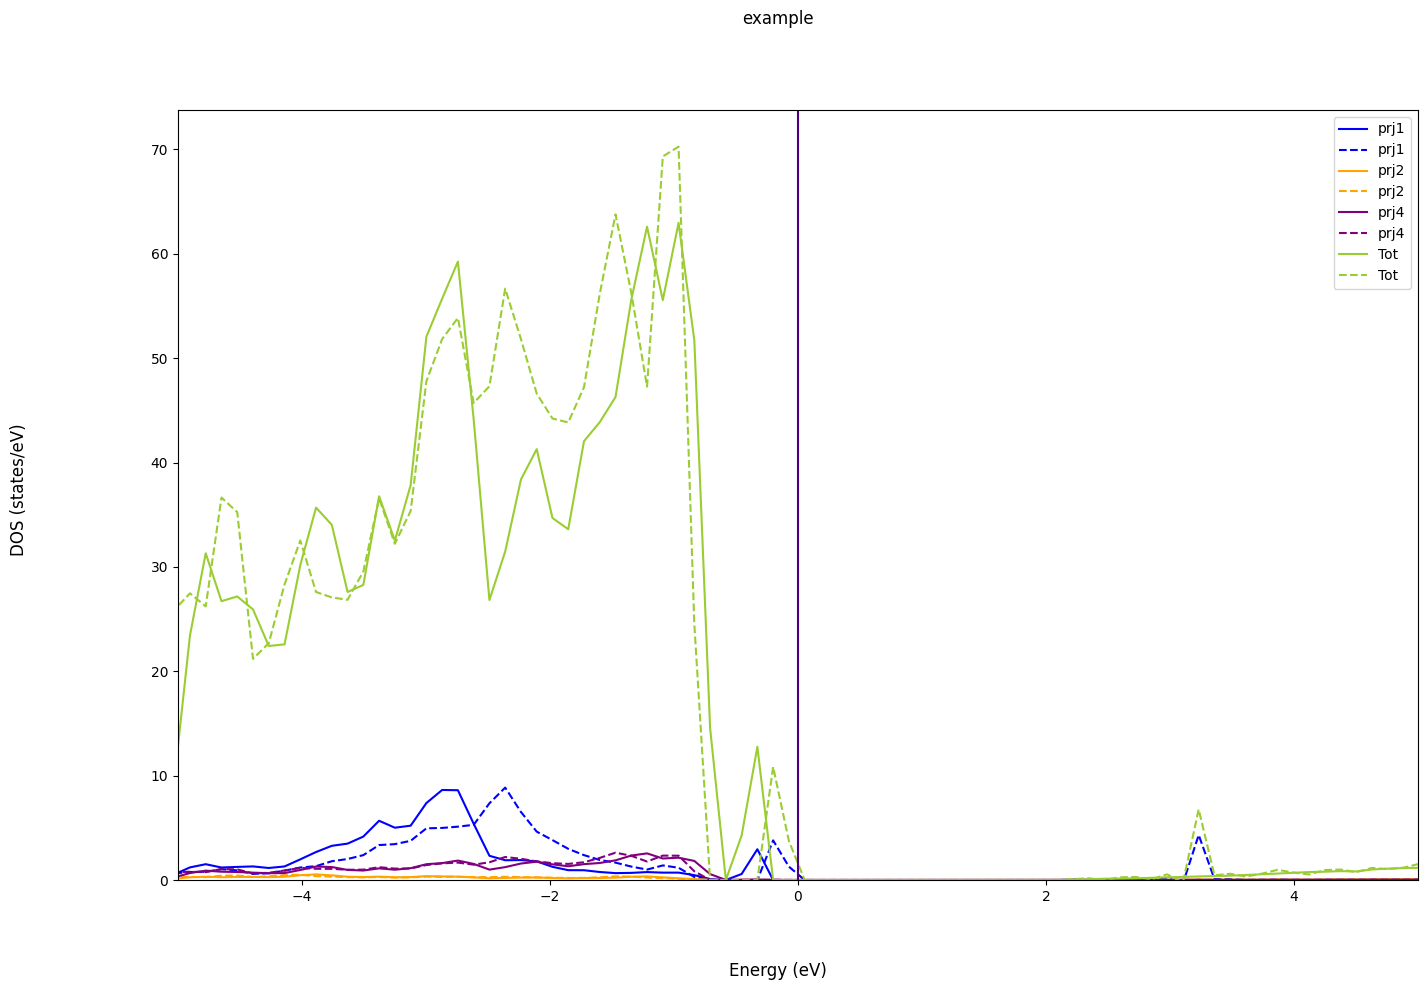

In [11]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16, 10),
                        linestl=['-', '--', 'dashdot', '-'], linewidth=1.5,
                        energy_range=[-5, 5],
                        color=['blue', 'orange', 'purple', 'yellowgreen'],
                        fermi='indigo', overlap=True,
                        labels=['prj1', 'prj2', 'prj4','Tot'], prj=[1,2,4,5])

### Electronic Structure

With the plot_electron_banddos() function the user will be able to plot a Band structure along side a DOSS plot as follows:

(202, 4, 1)


/var/folders/qb/x9snt43j6n1d_5rzfk8x_zk00000gn/T/ipykernel_53898/3574189289.py:1: UserWarning: Properties output file not found: 3D k path not available
  band_data = Properties_output().read_electron_band('data/hTaAs_lda_bande44.BAND')


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

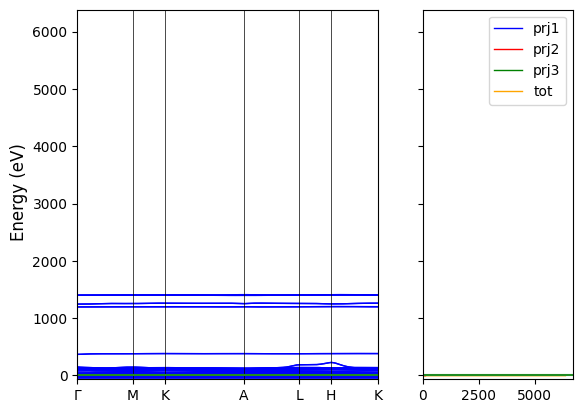

In [13]:
band_data = Properties_output().read_electron_band('data/hTaAs_lda_bande44.BAND')
doss_data = Properties_output().read_electron_dos('data/doss_96.DOSS')

cfplt.plot_electron_banddos(band_data, doss_data,
                            k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                            linestl_dos=['-', '-', '-', '-'],
                            labels=['prj1', 'prj2', 'prj3', 'tot'],
                            color_dos=['blue', 'red', 'green', 'orange'],legend=True)

As shown for other functions the user can select an energy range and further customize the plot as follows:

(<Figure size 1600x1000 with 2 Axes>,
 array([<Axes: >, <Axes: >], dtype=object))

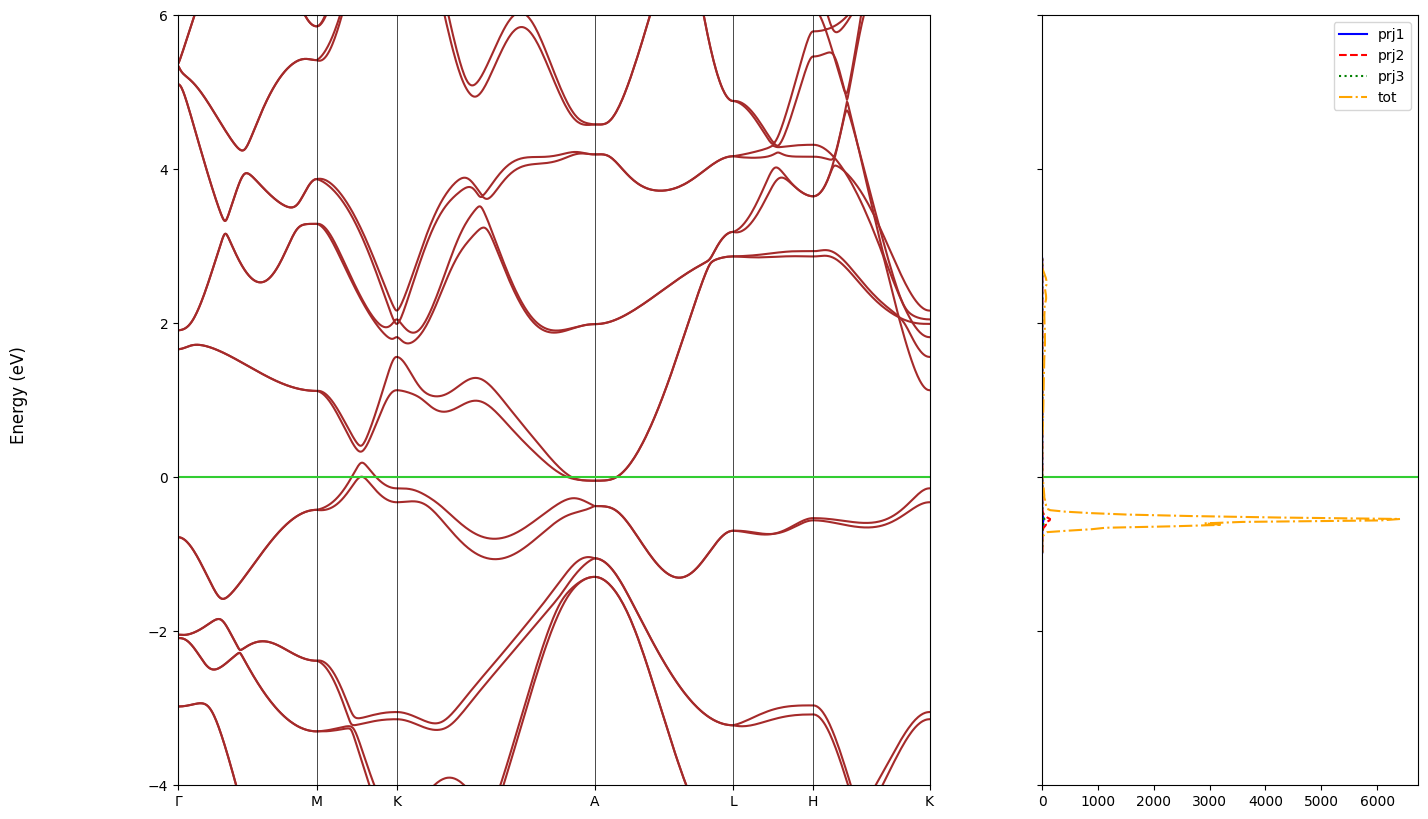

In [16]:
cfplt.plot_electron_banddos(band_data, doss_data,
                            k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                            linestl_dos=['-', '--', 'dotted', 'dashdot'],
                            labels=['prj1', 'prj2', 'prj3', 'tot'],
                            color_dos=['blue', 'red', 'green', 'orange'],
                            color_band='brown', fermi='limegreen', energy_range=[-4,6],
                            linestl_band='-', linewidth=1.5, figsize=(16,10), legend=True)

Furthermore you can plot a selection of projections as it happened in the plot_cry_doss() function

/opt/anaconda3/envs/develop/lib/python3.11/site-packages/CRYSTALpytools/plot.py:878: UserWarning: You have a number of linestl_doss element greater than the number of projection required(prj elements)!
  fig, ax = plot_cry_es(bands=bands, doss=doss, k_labels=k_labels, color_bd=color_band,


(<Figure size 1600x1000 with 2 Axes>,
 array([<Axes: >, <Axes: >], dtype=object))

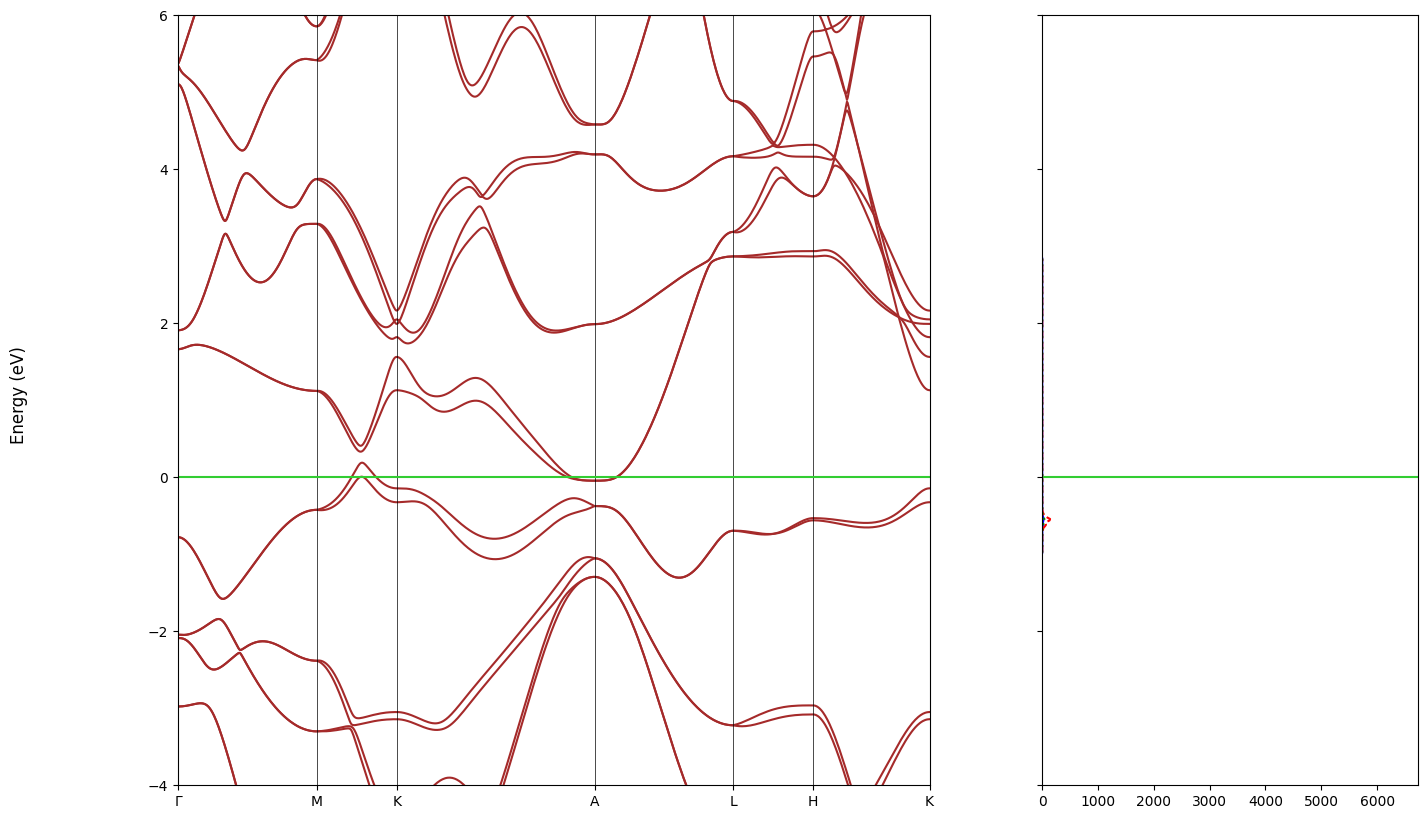

In [15]:
cfplt.plot_electron_banddos(band_data, doss_data,
                            k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                            labels=['prj1', 'prj2', 'prj3', 'tot'],
                            dos_prj=[1,2,3], linestl_dos=['-', '--', 'dotted'],
                            color_dos=['blue', 'red', 'green'],
                            color_band='brown', fermi='limegreen', linestl_band='-',
                            energy_range=[-4, 6], linewidth=1.5, figsize=(16, 10))

At last, the user will be able to restrict the density of state to a maximum range:

/opt/anaconda3/envs/develop/lib/python3.11/site-packages/CRYSTALpytools/plot.py:878: UserWarning: You have a number of linestl_doss element greater than the number of projection required(prj elements)!
  fig, ax = plot_cry_es(bands=bands, doss=doss, k_labels=k_labels, color_bd=color_band,


(<Figure size 1600x1000 with 2 Axes>,
 array([<Axes: >, <Axes: >], dtype=object))

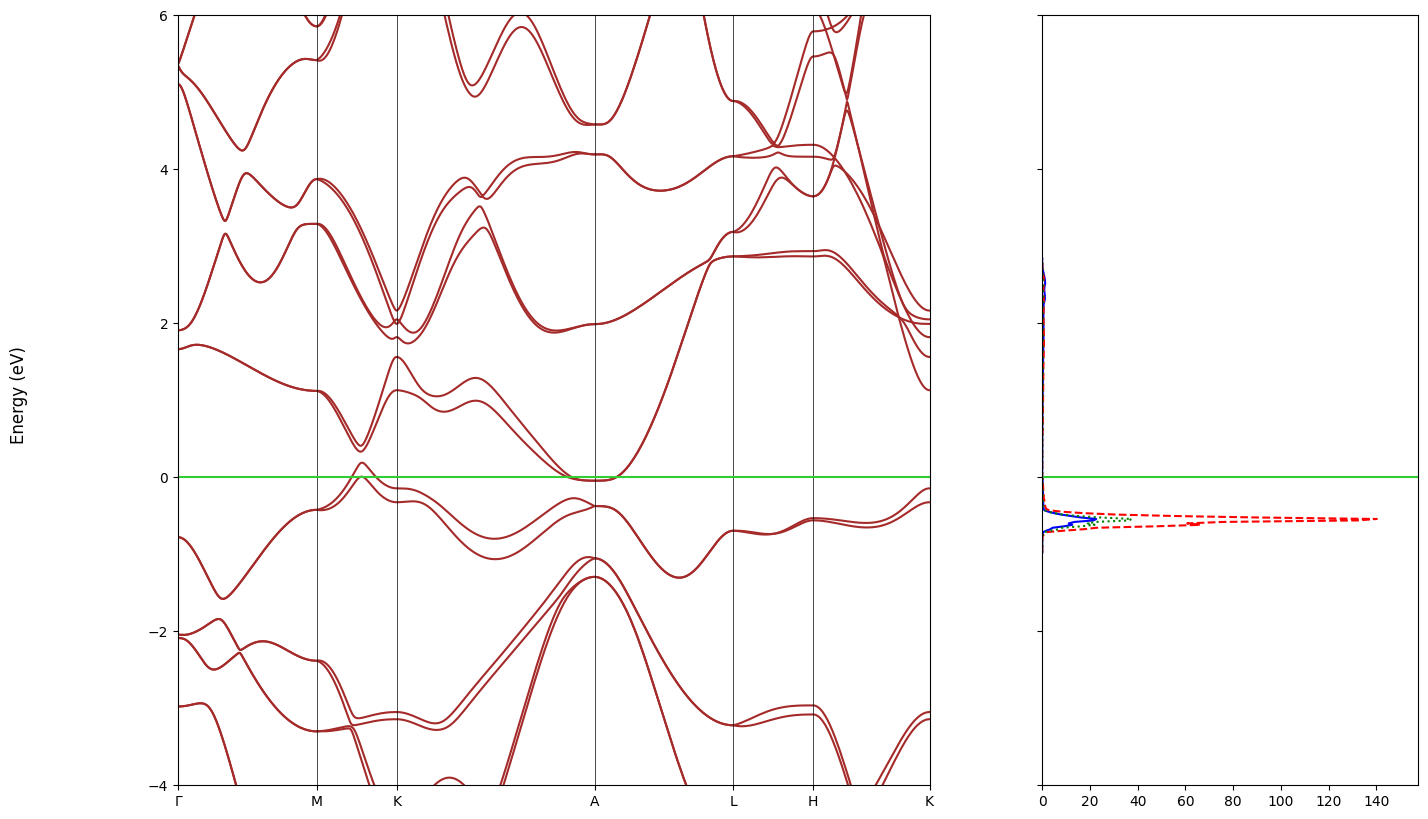

In [17]:
cfplt.plot_electron_banddos(band_data, doss_data,
                            k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                            labels=['prj1', 'prj2', 'prj3', 'tot'],
                            dos_range=[0,150], dos_prj=[1, 2, 3],
                            linestl_dos=['-', '--', 'dotted'],
                            color_dos=['blue', 'red', 'green'],
                            color_band='brown', fermi='limegreen', linestl_band='-',
                            energy_range=[-4, 6], linewidth=1.5, figsize=(16, 10))